# Optimization for Data Science 2022 Homework

## 0. Semi-supervised learning

Large amounts of data, but labels only for a small percentage of them. We therefore want to exploit some similarity measure between the data points to assign a class to the unlabeled ones, making the assumption that examples "similar" in the feature space share the same label. We have
- $l$ labeled examples $(\bar{x}^i, \bar{y}^i)$ for $i = 1, \ldots, l$;
- $u$ labeled examples $x^j$ for $j = 1, \ldots, u$.

__GOAL__: find appropriate labels $y^j$ for $j = 1, \ldots, u$.

How? Define similarity scores
- $w_{ij}$ similarity between labeled example $i$ and unlabeled example $j$;
- $\bar{w}_{ij}$ similarity between unlabeled examples $i$ and $j$.

Then, solve the problem $$min_{y \in \mathbb{R}^u} \sum_{i=1}^l \sum_{j=1}^u w_{ij} (y^j - \bar{y}^i)^2 + \frac{1}{2} \sum_{i=1}^u \sum_{j=1}^u \bar{w}_{ij} (y^i - y^j)^2$$

Where the first term penalizes the assignment of labels different from the known
close ones, while the second one ensures that similar points are assigned similar labels.

We consider a problem with 2 classes with labels $\{-1,1\}$.

## 1. Generating the dataset

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

NUM_SAMPLES = 2000
NUM_LABELED = 100
SEED = 42
np.random.seed(SEED)

In [ ]:
X, Y = make_blobs(n_samples=NUM_SAMPLES, centers=2, n_features=2)
Y[Y==0] = -1

X_labeled, Y_labeled = X[:NUM_LABELED,:], Y[:NUM_LABELED]
X_unlabeled = X[NUM_LABELED:,:]

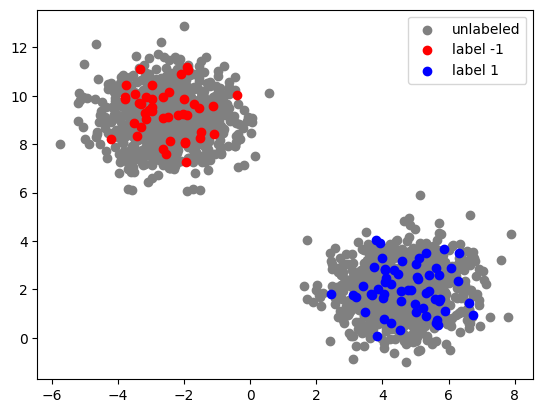

In [ ]:
plt.scatter(X_unlabeled[:,0], X_unlabeled[:,1], color='gray', label='unlabeled')
plt.scatter(X_labeled[Y_labeled==-1,0], X_labeled[Y_labeled==-1,1], color="red", label="label -1")
plt.scatter(X_labeled[Y_labeled==1,0], X_labeled[Y_labeled==1,1], color="blue", label="label 1")
plt.legend()
plt.show()

__BONUS EXERCISE__: experiment with different kinds of generated datasets.

## 2. Similarity scores

TO DO: define a similarity function (or import one).

In [ ]:
def similarity(A, B):
    # YOUR CODE HERE
    raise NotImplementedError

In [ ]:
W = similarity(X_labeled, X_unlabeled)
W_bar = similarity(X_unlabeled, X_unlabeled)

In [ ]:
# sanity check
assert W.shape == (X_labeled.shape[0], X_unlabeled.shape[0])
assert W_bar.shape == (X_unlabeled.shape[0], X_unlabeled.shape[0])

## 3. Cost function

TO DO: define a function to efficiently compute the cost function
$$f(y) = \sum_{i=1}^l \sum_{j=1}^u w_{ij} (y^j - \bar{y}^i)^2 + \frac{1}{2} \sum_{i=1}^u \sum_{j=1}^u \bar{w}_{ij} (y^i - y^j)^2$$
Suggestion: rewrite the function with matrix/vector operations instead of sums, and implement the function using numpy operations.

In [ ]:
def cost_func(y):
    # YOUR CODE HERE
    raise NotImplementedError

We can check the cost using the "true" labels we discarded, or with label 0 for all

In [ ]:
print(cost_func(Y[NUM_LABELED:]))
print(cost_func(np.zeros(NUM_SAMPLES - NUM_LABELED)))

## 4. Gradient

Hint: the partial derivatives (gradient with respect to $y^j$) are of the form
$$ \nabla_{y^j}f(y) = 2 \sum_{i=1}^l w_{ij} (y^j - \bar{y}^i) + 2 \sum_{i=1}^u \bar{w}_{ij} (y^j - y^i)$$

TO DO: define a function to efficiently compute this partial derivative with vector operations.

In [ ]:
def gradient_j(y, j):
    # YOUR CODE HERE
    raise NotImplementedError

In [ ]:
gradient_j(np.zeros(NUM_SAMPLES - NUM_LABELED), 0)

Now, let's define an efficient function to compute the entire gradient, always using vector operations. (You might find it easier to first obtain a good formula for the entire gradient, and then derive one for the partial derivative)

In [ ]:
def gradient(y):
    # YOUR CODE HERE
    raise NotImplementedError

In [ ]:
gradient(np.zeros(NUM_SAMPLES - NUM_LABELED))[:10]

__BONUS EXERCISE__: is the gradient Lipshitz continous? If so, prove it and compute $L$ to use for gradient descent.

__BONUS EXERCISE__: is the objective function strongly convex? If so, prove it and compute $\sigma$ to use for gradient descent.

## 5. Gradient Descent

We now have the necessary ingredients to minimize the cost function.

We are only missing a starting point, a stopping rule and a stepsize.

In [ ]:
Y_0 = # define an appropriate starting point
assert Y_0.shape == (NUM_SAMPLES - NUM_LABELED,)

EPSILON = # define small epsilon for stopping criterion
MAX_ITER = # and/or a maximum number of iterations (or even a maximum time)

ALPHA = # define a fixed stepsize

Now we are ready to perform gradient descent.

TO DO: complete the code below, and feel free to make the loop more efficient and/or print useful information, such as if convrgence was achieved or if the maximum number of iterations was reached.

__BONUS EXERCISE__: instead of a fixed stepsize, implement Armijo line search.

In [ ]:
import time

Y_iterates = [Y_0]
times = [0]
start = time.time()
while False: # TO DO: write the condition for the while loop
    new_y = # TO DO: write the update
    Y_iterates.append(new_y)
    times.append(time.time() - start)

Let's plot the results

In [ ]:
plt.plot(times, [cost_func(y) for y in Y_iterates])
plt.xlabel('CPU time (seconds)')
plt.ylabel('Objective function')
plt.yscale("log")
plt.show()

## 6. BCGD with Gauss-Southwell method

For BCGD, we consider blocks composed of individual coordinates of $y$, so changing at each step only the label for one datapoint. In order for this strategy to be worthwhile computationally, we need an efficient way to update the gradient.

TO DO: compute the change in the gradient after a step of $\eta$ along coordinate $j$, that is (indicating with $e_j$ the vector with all entries equal to 0 except for the $j^{th}$ equal to 1), find the difference
$$ \nabla f(y + \eta e_j) - \nabla f(y) = ? $$
and define an efficient function to compute it.

In [ ]:
def gradient_update(y, j, eta):
    # YOUR CODE HERE
    raise NotImplementedError

__BONUS EXERCISE__: it is possible to perform an exact line search over one single coordinate in closed form. Find the exact $\alpha$ such that
$$f(y - \alpha \nabla_{y^j} f(y) e_j) $$ is minimized.

HINT: compute the derivative with respect to $\alpha$ and find the value for which it is zero.

We can now define the usual ingredients for gradient descent:

In [ ]:
Y_0 = # define an appropriate starting point
assert Y_0.shape == (NUM_SAMPLES - NUM_LABELED,)

EPSILON = # define small epsilon for stopping criterion
MAX_ITER = # and/or a maximum number of iterations

ALPHA = # define a fixed stepsize

TO DO: complete the code for BCGD with GS rule.

In [ ]:
Y_iterates = [Y_0]
times = [0]
start = time.time()
grad = gradient(Y_0)
while False: # TO DO: write the condition for the while loop
    gs_index = # TO DO: identify the coordinate to update
    e_j = # TO DO: define the vector e_j
    new_y = Y_iterates[-1] - ALPHA * grad[gs_index] * e_j
    grad += gradient_update(None, None, None) # TO DO: update the gradient
    Y_iterates.append(new_y)
    times.append(time.time() - start)

Let's plot the results

In [ ]:
plt.plot(times, [cost_func(y) for y in Y_iterates])
plt.xlabel('CPU time (seconds)')
plt.ylabel('Objective function')
plt.yscale("log")
plt.show()

## 7. Other methods

__BONUS EXERCISE__: implement randomized BCGD and with cyclic order.

## 8. Real dataset

We can test these algorithms on a real, albeit toy, dataset. We use MNIST handwritten digits 0's and 1's.

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True)
X, Y = mnist['data'], mnist['target'].astype(int)

# filter only zeros and ones
X = X[(Y == 0) | (Y == 1)].to_numpy()
Y = Y[(Y == 0) | (Y == 1)].to_numpy()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X.shape

(14780, 784)

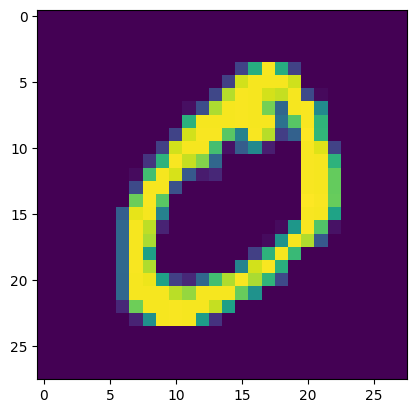

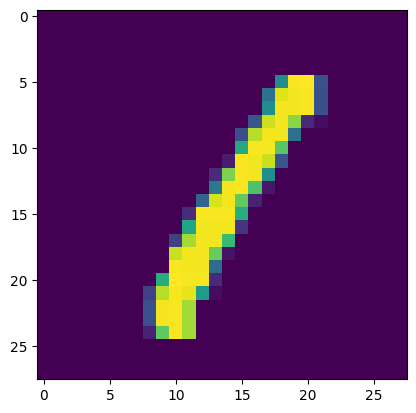

In [ ]:
for i in range(2):
  plt.imshow(X[i].reshape(28,28))
  plt.show()

In [ ]:
NUM_LABELED = 400

Y[Y==0] = -1

X_labeled = X[:NUM_LABELED,:]
Y_labeled = Y[:NUM_LABELED]
X_unlabeled = X[NUM_LABELED:,:]

TO DO: test gradient descent and BCGD with GS rule on this real dataset.